<a href="https://colab.research.google.com/github/GeorgievskaEmilija/Data-Science-Lab-Exercises/blob/main/183044_Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Understand the structure of a web page.</li>
<li>Understand how to use Beautiful soup to scrape content from web pages.</li>
<li>Feel comfortable storing and manipulating the content in various formats.</li>
<li>Understand how to convert structured format into a Pandas DataFrame.</li>
</font>
</ul>

<font size = 4 color = "blue">For this homework your job is to find a web-site from which you will extract the data, we are suggestioning for a local-site like time.mk, sitel.mk, vecer.mk, panacea.mk, etc. Accordinly with the choice you've made make a quick summary why did you use especially this web-site and what is the part of interest.</font>

#<font color = 'Orange'>Explain the Web-site that you will be using in this homework.</font>

In the following text-box answer the questions:
<li>Why did you choose this web site?</li>
<li>What is your area of interest from it?</li>
Then add screenshot from the site.(just copy and paste the image in the text-box or insert it from your computer)


Го избрав овој сајт (https://www.kafepauza.mk/category/tehnologija/) бидејќи сметам дека би можела да најдам интересни информации, и овој сајт го посетувам често.




Ќе истражувам новости од областа на технологијата.


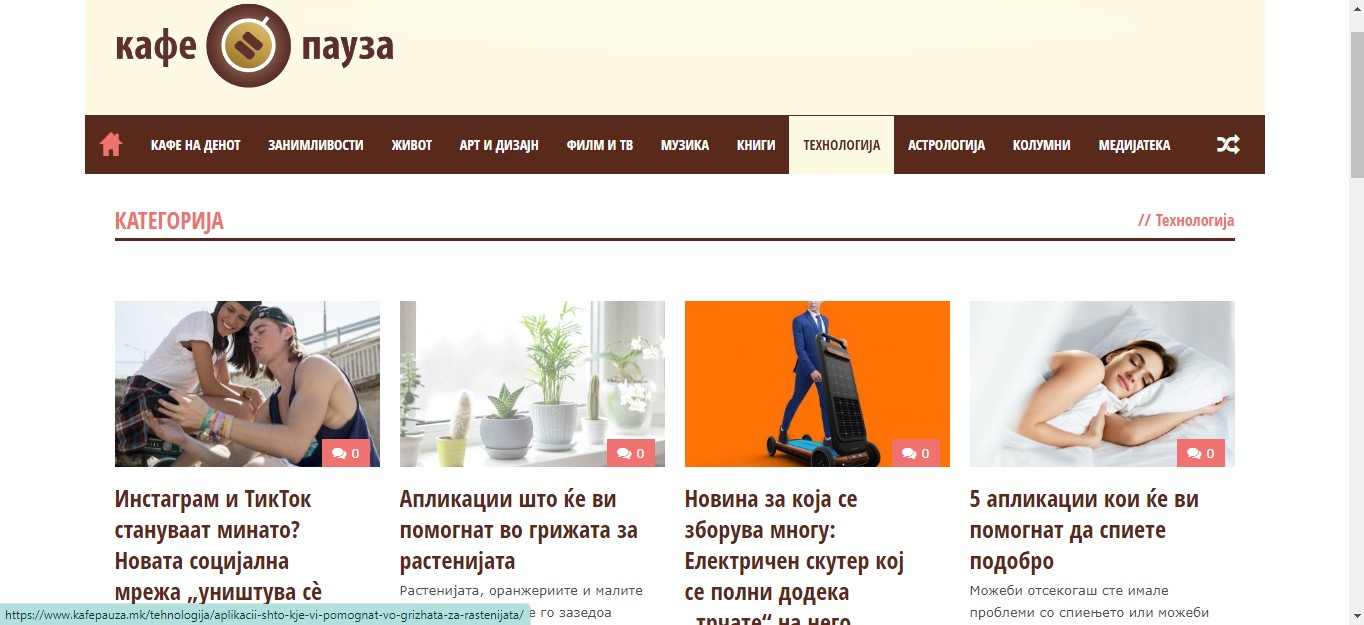

# <font color='Orange'>Requirements specified for Web Scraping</font>

Import all libraries and modules that you are going to use.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
from bs4 import BeautifulSoup
from IPython.display import HTML

import seaborn as sb
sb.set_context('notebook')
sb.set_style('whitegrid')


import requests
requests.packages.urllib3.disable_warnings()
import warnings
warnings.filterwarnings("ignore")


# <font color = 'Orange'> Start the scraping by sending HTTP request</font>

 **Fetch a website's content - send request**

In [ ]:
myurl='https://www.kafepauza.mk/category/tehnologija/'
snapshot=requests.get(myurl)

**Get the response-status code and see:**
<li>If the code starts with a 2, it means the request was successful.


If your webpage is responding with 400, then try again or change it with another one having similar content.

In [ ]:
snapshot

<Response [200]>

# <font color = 'orange'>Parse the HTML with BeautifulSoup</font>

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work. 


**Parse using BeautifulSoap**




In [ ]:
raw_html=snapshot.text
soup=BeautifulSoup(raw_html,'html.parser')

**Print the HTML code that you get**

In [ ]:
soup

<!DOCTYPE html>

<!--[if lt IE 7]><html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="en-US" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#"> <![endif]-->
<!--[if IE 7]><html class="no-js lt-ie9 lt-ie8" lang="en-US" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#"> <![endif]-->
<!--[if IE 8]><html class="no-js lt-ie9" lang="en-US" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#"> <![endif]-->
<!--[if gt IE 8]><html class="no-js" lang="en-US" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#"><![endif]-->
<!-- H1 -->
<html dir="ltr" lang="mk" xml:lang="mk" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml">
<head>
<!-- Basic Page Needs
  ================================================== -->
<meta charset="utf-8"/>
<title>Технологија | Кафе пауза</title>
<!--[if lt IE 9]>
		<script src="https://html5shiv.googlecode.com/svn/trunk/html5.js"></script>
	<![endif]-->
<!-- Jquery -->
<script crossorigin="anonymous" integrity="sha256-lZFHibX

# <font color='Orange'>Extracting data</font>

From the printed HTML code search for the data you need for building the dataset, find the classes for groupby option.

**In the following text-box write the attributes you are going to use**

`Title, Date, Author
`

**Try to select the first element from your attributes. Find out from the html code what part do you need.**

In [ ]:
titles=soup.select('h2')
str(titles[0].prettify())


'<h2 class="blog-title">\n <a href="https://www.kafepauza.mk/tehnologija/human-odnos-kon-zhivotnite-aplikacija-kje-gi-locira-machkite-i-kuchinjata-skitnici-niz-istanbul/">\n  Хуман однос кон животните: Апликација ќе ги лоцира мачките и кучињата скитници низ Истанбул\n </a>\n</h2>\n'

**Add as many codeboxes as you need for selecting all the html elements**

In [ ]:
#just example for myself
primer=soup.select('.blog-content-wrapper')
str(primer[0].prettify())

'<div class="blog-content-wrapper">\n <div class="blog-media-wrapper gdl-image">\n  <a href="https://www.kafepauza.mk/tehnologija/human-odnos-kon-zhivotnite-aplikacija-kje-gi-locira-machkite-i-kuchinjata-skitnici-niz-istanbul/">\n   <img alt="Хуман однос кон животните: Апликација ќе ги лоцира мачките и кучињата скитници низ Истанбул" src="https://www.kafepauza.mk/wp-content/uploads/2020/10/1-human-odnos-kon-zhivotnite-aplikacija-kje-gi-locira-machkite-i-kuchinjata-skitnici-niz-istanbul-400x250.jpg"/>\n  </a>\n  <div class="blog-comment">\n   <i class="icon-comments">\n   </i>\n   <a href="https://www.kafepauza.mk/tehnologija/human-odnos-kon-zhivotnite-aplikacija-kje-gi-locira-machkite-i-kuchinjata-skitnici-niz-istanbul/#respond">\n    0\n   </a>\n  </div>\n </div>\n <h2 class="blog-title">\n  <a href="https://www.kafepauza.mk/tehnologija/human-odnos-kon-zhivotnite-aplikacija-kje-gi-locira-machkite-i-kuchinjata-skitnici-niz-istanbul/">\n   Хуман однос кон животните: Апликација ќе ги лоц

In [ ]:
#1
titles=soup.select('h2')
str(titles[0].prettify())

'<h2 class="blog-title">\n <a href="https://www.kafepauza.mk/tehnologija/human-odnos-kon-zhivotnite-aplikacija-kje-gi-locira-machkite-i-kuchinjata-skitnici-niz-istanbul/">\n  Хуман однос кон животните: Апликација ќе ги лоцира мачките и кучињата скитници низ Истанбул\n </a>\n</h2>\n'

In [ ]:
#2 
dates= soup.select(".blog-date")
str(dates[0].prettify())

'<div class="blog-date">\n <span class="head">\n  Датум:\n </span>\n <a href="https://www.kafepauza.mk/2020/10/28/">\n  28 окт 2020\n </a>\n</div>\n'

In [ ]:
#3
authors=soup.select(".blog-author")
str(authors[0].prettify())

'<div class="blog-author">\n <span class="separator">\n  ,\n </span>\n <span class="head">\n  Автор:\n </span>\n <a href="https://www.kafepauza.mk/author/marijana-gavrilova/" rel="author" title="Posts by Маријана Гаврилова">\n  Маријана Гаврилова\n </a>\n</div>\n'

**Create lists with the extracted data from the html elements that you selected**

In [ ]:

#1
titlesList=[]
for i in range(0, len(titles)):
  titlesList.append(titles[i].text)

#2
datesList=[]
for i in range(0, len(dates)):
  datesList.append(dates[i].text[7:])
  

#3
  authorsList=[]
for i in range(0, len(authors)):
  authorsList.append(authors[i].text[9:])

**Print all lists that are containing the elements**

In [ ]:
#1
titlesList



['Хуман однос кон животните: Апликација ќе ги лоцира мачките и кучињата скитници низ Истанбул',
 'Инстаграм и ТикТок стануваат минато? Новата социјална мрежа „уништува сè пред себе“',
 'Апликации што ќе ви помогнат во грижата за растенијата',
 'Новина за која се зборува многу: Електричен скутер кој се полни додека „трчате“ на него',
 '5 апликации кои ќе ви помогнат да спиете подобро',
 '5-те најдобри пози што ќе ви донесат многу лајкови и следбеници на Инстаграм',
 '20 клучни зборови кои ќе ви донесат повеќе лајкови на сликите од ентериерот',
 'Пет трендови на социјалните мрежи за 2020 година',
 'Дали вашата лозинка треба да содржи празни места?',
 'Најголемите митови за Инстаграм',
 'Што не смеете да пребарувате на Интернет?',
 'Блутут уредите можат да бидат хакирани и од голема далечина']

In [ ]:
#2
datesList

['28 окт 2020',
 '27 окт 2020',
 '20 окт 2020',
 '08 окт 2020',
 '27 јул 2020',
 '19 мај 2020',
 '10 мај 2020',
 '28 дек 2019',
 '29 ное 2019',
 '15 ное 2019',
 '14 ное 2019',
 '08 ное 2019']

In [ ]:
#3
authorsList

['Маријана Гаврилова',
 'Маријана Гаврилова',
 'Христина Видевска',
 'Маријана Гаврилова',
 'Маријана Гаврилова',
 'Христина Видевска',
 'Христина Видевска',
 'Христина Видевска',
 'Христина Видевска',
 'Христина Видевска',
 'Христина Видевска',
 'Христина Видевска']

**Check if all lists are the same size**

In [ ]:
len(titlesList) == len(datesList) == len(authorsList)

True

# <font color='Orange'>Create a Pandas DataFrame</font>

**Create the DataFrame from the lists you get and name your *Columns***

In [ ]:
matrix=[]
for i in range(0, len(titlesList)):
  matrix.append([titlesList[i],datesList[i],authorsList[i]])

dataframe=pd.DataFrame(np.array(matrix), columns=['Наслов','Датум', 'Автор'])




**Print the dataset you obtain**

In [ ]:
from pandas import option_context

with option_context('display.max_colwidth', 400):
    display(dataframe)

,Наслов,Датум,Автор
0,Хуман однос кон животните: Апликација ќе ги лоцира мачките и кучињата скитници низ Истанбул,28 окт 2020,Маријана Гаврилова
1,Инстаграм и ТикТок стануваат минато? Новата социјална мрежа „уништува сè пред себе“,27 окт 2020,Маријана Гаврилова
2,Апликации што ќе ви помогнат во грижата за растенијата,20 окт 2020,Христина Видевска
3,Новина за која се зборува многу: Електричен скутер кој се полни додека „трчате“ на него,08 окт 2020,Маријана Гаврилова
4,5 апликации кои ќе ви помогнат да спиете подобро,27 јул 2020,Маријана Гаврилова
5,5-те најдобри пози што ќе ви донесат многу лајкови и следбеници на Инстаграм,19 мај 2020,Христина Видевска
6,20 клучни зборови кои ќе ви донесат повеќе лајкови на сликите од ентериерот,10 мај 2020,Христина Видевска
7,Пет трендови на социјалните мрежи за 2020 година,28 дек 2019,Христина Видевска
8,Дали вашата лозинка треба да содржи празни места?,29 ное 2019,Христина Видевска
9,Најголемите митови за Инстаграм,15 ное 2019,Христина Видевска


# <font color = 'Green'>Advanced part</font>

<font color = 'blue'>This part is not mandatory and is intended for those who want to expand their knowledge in this field</font>

There are other libraries in Python that can be used to scrape a website. Some examples are Scrapy (https://scrapy.org/) and Selenium (https://selenium-python.readthedocs.io/).




## <font color = 'Green'>Extra task 1: Selenium</font>
Selenium is a robust framework designed to automate tests for Web Applications. It provides a way for the developer to write tests in several popular programming languages such as C#, Java, Python, Ruby, etc. This framework is developed to perform browser automation. Selenium is an excellent choice when you want to deal with Core Javascript-based web Applications and make browser automation with AJAX/PJAX Requests.

Your task is to extract data by sending a request using Selenium on more complicated pages with Forms or Javascript. 
View these links for more details: 

*   https://selenium-python.readthedocs.io/installation.html
*   https://selenium-python.readthedocs.io/getting-started.html
*   https://pypi.org/project/selenium-requests/
*   https://pypi.org/project/selenium-wire/


In [ ]:
#requirements for colab
# install chromium, its driver, and selenium
!apt update
!apt install chromium-chromedriver
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
wd = webdriver.Chrome(options=options)
wd.get("https://www.website.com")
print(wd.page_source)  # results
# divs = wd.find_elements_by_css_selector('div')

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports

## <font color = 'Green'>Extra task 2: Scrape some Google site</font>

Your task is to get data from some of the Google sites. For example, get user comments and rating for applications on Google Play (https://play.google.com/store/apps/category/EDUCATION), or scrape the google search results for example https://www.google.com/search?q=finki.